# Modelling Hedge Funds

Click here for an interactive version of this notebook:-
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/pjohno/MSc-Math-Finance-2018/master?filepath=notebooks%2FMSc%20Project%205%20-%20Hedge%20Funds.ipynb)

We think of the allocation problem as Merton, that is the manager wants to allocate the fund money between a risky asset and a risk-less asset or bank account, to maximise his own utility (a concave function) of wealth.

Let $X_t$ be the amount of money invested in the Hedge fund, which is divided in $M_t$ the money in the bank account and $R_t$ the risky investment, having dynamics.
$$
 dR_t = \mu R_t dt + \sigma R_t dB_t
 $$
 $$
 dM_t = r M_t dt 
$$

where $\mu$ is the rate of return of the risky investment, $\sigma$ its volatility and $r$ the risk-free interest rate. Let $p$ be the portfolio allocation in the risky investment (i.e. the percentage invested in the risky asset), thus we can write the dynamics of the fund as 

$$
dX_t = \big( (r + (\mu -r)p) X_t \big) dt +\sigma p X_t dB_t 
$$

The manager's wealth $W_t = f(X_t)$ is subjected to:
- Proportion owned, the manager owns a small portion  $a$ of the fund.
- Management fee, over the period $t_i$
- Incentive fees, in the case of favourable results, for fund values above a pre-established high-water mark $H_T$. 
- Owners closure, or exogenous closure, if the fund is performing very poorly, which means that the price drops less than half the high-water mark $\Phi$, the investor chooses to close the fund.
- Managers closure, or endogenous closure, if outside opportunities (represented by $L$) are fairer, the manager chooses to close the fund.

Hence the managers wealth at terminal time is

\begin{equation}\label{eq:ManagerPayment}
f(X_T) = \begin{cases}
a X_T + (1-a)b T X_T + (1-a)c (X_T - H_T)^+ & \text{If no closure events occurs}\\
a X_t + (1-a)b t X_t + L(T-t) & \text{If an endogenous closure happen at time }t \\
a X_t + (1-a)b t \Phi  & \text{If an exogenous closure happen at time }t.
\end{cases}
\end{equation}

The manager's problem  is to find the optimal portfolio allocation $p$ that maximises his expected utility of wealth
\begin{equation*}
\displaystyle J(X_t=x, t) = \max_{p} \left\{ \mathbb{E}^{x,t}\left[ U(f(X_T)) \right] \right\}
\end{equation*}
where $p \in [0,4.5]$, we use a CRRA the utility function $\left( \displaystyle U(x) = \frac{x^{1-\gamma}}{1-\gamma} \right)$.


Using stochastic control techniques we derive the corresponding HJB equation
\begin{eqnarray}\label{eq:HJBManager}
& \displaystyle \frac{\partial J}{\partial t} + \max_{p} \left\{ \frac{1}{2} \sigma^2p^2 X^2 \frac{\partial^2 J}{\partial X^2} +\left( (r + (\mu -r)p)X \right)\frac{\partial J}{\partial X} \right\} = 0, \\
\nonumber & J(X_T, T) = U(f(X_T)) = g(X_T)
\end{eqnarray}

## Initial Problem

To make things very simple to begin with, we are going to solve a problem
with **no** incentive fees, so that we simply have the final condition on $J$ that

\begin{equation}\label{eq:SimpleManagerPayment}
J(X_T,T) = U( X_T ).
\end{equation}

Now, let us include the extra condition to close the fund if it underperforms, we do this with the following condition

\begin{equation}\label{eq:barrier}
J(X_t,t) = U( X_t e^{r(T-t)} ) \quad \text{ if } \quad X_t \leq 0.5 .
\end{equation}

Here we have assumed that if the fund is closed the money is taken out and put in a risk-free bank account (hence the inflation by risk-free rate $r$), so we need the utility of that money at $t=T$ to compare.

Now we are going to outline how to solve 

\begin{equation}\label{eq:SimpleHJBManager}
  \frac{\partial J}{\partial t} + \max_{p} \left\{ \frac{1}{2} \sigma^2p^2 X^2 \frac{\partial^2 J}{\partial X^2} +\left( (r + (\mu -r)p)X \right)\frac{\partial J}{\partial X} \right\} = 0
\end{equation}

and derive the boundary conditions. At $t=T$ we have the final condition on $J$ as given above, so what happens at $X_t=0.5$ and $X_t\rightarrow \infty$? Well first notice that if we take derivatives with respect to the control $p$ of the PDE we get

\begin{align}\label{eq:SimpleHJBManagerwrtp}
  \frac{\partial^2 J}{\partial t\partial p} + \max_{p} \left\{ \frac{1}{2} \sigma^2p^2 X^2 \frac{\partial^3 J}{\partial X^2\partial p} +\left( (r + (\mu -r)p)X \right)\frac{\partial^2 J}{\partial X\partial p} \quad \right. & \nonumber \\
  \left.+\sigma^2p X^2 \frac{\partial^2 J}{\partial X^2}+ (\mu -r)X\frac{\partial J}{\partial X} \right\} & =0
\end{align}

and if $p$ is a maximum then all derivatives w.r.t. $p$ should be zero, so we are left with

\begin{equation}\label{eq:conditiononp}
\sigma^2p X^2 \frac{\partial^2 J}{\partial X^2}+ (\mu -r)X\frac{\partial J}{\partial X}=0.
\end{equation}

It follows then that the optimal choice of p is 

\begin{equation}
p = \frac{(\mu -r)(\partial J/\partial X)}{\sigma^2 X (\partial^2 J/\partial X^2)}
\end{equation}

and the boundary condition as $X\rightarrow\infty$ can be found by assuming that the solution
takes the form

$$
J(X,t) = g(t)X^\gamma
$$

## Numerical Scheme


We propose to implement a implicit-explicit finite difference scheme. The notation is as follows

- space variable $X = x_j = X_\text{min} + j\Delta X$ where $\frac{X_\text{max}-X_\text{min}}{jMax}$ 
- time variable $t = t^i = i\Delta t$ where $\frac{T}{iMax}$ 
- value function $J(X,t) = J(X_j,t^i) \approx v^{i}_j$. 
- optimal proportion $p(X,t)= p(X_j,t^i) \approx p^{i}_j$. 

Note here that $v$ and $p$ are **both** functions of $X$ and $t$ so we have to solve for both $v$ and $p$ simultaneously. We are going to assume for simplicity that $p$ is held constant across the timestep and can be found explicitly using $v^i_j$.

The numerical scheme can be written in the following form
$$
p^i_j =  \frac{(\mu -r)(v^{i+1}_{j+1}-v^{i+1}_{j-1})dX}{2\sigma^2 X_j (v^{i+1}_{j+1}-2v^{i+1}_{j}+v^{i+1}_{j-1})}
$$

$$
a_j v^i_{j-1} +b_j v^i_j + c_j v^i_{j+1}= d_j  
$$

where the coefficients are
$$
a_j = \frac12(p^i_j)^2\sigma^2\frac{X_j^2}{dX^2} -  \frac12(r+(\mu-r)p_j^i)\frac{X_j}{dX}
$$ 
$$
b_j = -(p^i_j)^2\sigma^2\frac{X_j^2}{dX^2}-\frac{1}{dt};
$$ 
$$
c_j = \frac12(p^i_j)^2\sigma^2\frac{X_j^2}{dX^2} + \frac12(r+(\mu-r)p_j^i)\frac{X_j}{dX}
$$ 
and 
$$
d_j = -\frac{v_j^{i+1}}{dt}
$$ 


In [1]:
#include "msc_project_5.hpp"

Set up storage for parameters and vectors required:

In [2]:
// ONLY RUN THIS CELL ONCE AT THE START
// problem parameters
double Gamma,sigma,r,mu,T,xMin,xMax;
std::vector<double> X,pt,Jt,investmentYield;

// grid parameters
int iMax,jMax,n;
//set up local parameters
double dt;
double dX;

Assign initial values

In [3]:
Gamma=-3;
sigma=0.05;
r=0.0538;
mu=r+0.02;
T=1;
xMin=0.5; // minimum fund value
xMax=5; // minimum fund value 
n=500;

iMax=T*n;
jMax=n;
//set up local parameters
dt = T/iMax;
dX = (xMax-xMin)/jMax;
X.resize(jMax+1);pt.resize(jMax+1);Jt.resize(jMax+1);
// setup and initialise the stock price 
for(int j=0;j<=jMax;j++)
{
    X[j] = xMin + j*dX;
}
// setup and initialise the final conditions on the option price 
// this just uses U(X) as the final condition
for(int j=0;j<=jMax;j++)
{
    Jt[j] = pow(X[j],Gamma)/Gamma;
}

Now solve the problem. We run backwards through time, solving first for the value of $p$ before putting the value of $p$ inside the PDE coefficients to solve for $v$. We use the tridag solver (as opposed to SOR) to solve the resulting matrix equation. We have also adapted the scheme to ensure stability by making sure that the coefficient $a$ is always positive.

In [4]:
// start looping through time levels
for(int i=iMax-1;i>=0;i--)
{
    std::vector<double> JtOld(Jt);
    // first calculate optimal p using the values at t+dt
    for(int j=1;j<=jMax-1;j++)
    {
        double dJdX = ( JtOld[j+1] - JtOld[j-1] ) / 2. / dX;
        double d2JdX2 = ( JtOld[j+1] - 2.*JtOld[j] + JtOld[j-1] ) / dX / dX;
// bound p in between 0 and 5
        double p = std::min(std::max(0.,(r-mu)*X[j]*dJdX / (sigma*sigma*X[j]*X[j]*d2JdX2)),5.);
        if(d2JdX2>0)p=5.;
        pt[j]=p;
    }
    // declare vectors for matrix equations
    std::vector<double> a(jMax+1),b(jMax+1),c(jMax+1),d(jMax+1);
    // boundary condition assumes that p=0 at X=0
    a[0]=0.;b[0]=1./dt + .5*r*xMin/dX;c[0]= -0.5*r*xMin/dX;d[0] = JtOld[0]/dt + 0.5*r*xMin*( JtOld[1]-JtOld[0] )/dX;
    for(int j=1;j<=jMax-1;j++)
    {
        double p=pt[j];
        // change these ptOld[j] to p's to update at each step
        if((r+(mu-r)*p)*X[j]/dX>p*p*sigma*sigma*X[j]*X[j]/dX/dX)
        {
            a[j]=0.5*(p*p*sigma*sigma*X[j]*X[j]/dX/dX);
            b[j]=-p*p*sigma*sigma*X[j]*X[j]/dX/dX-(r+(mu-r)*p)*X[j]/dX-1./dt;
            c[j]=0.5*p*p*sigma*sigma*X[j]*X[j]/dX/dX+(r+(mu-r)*p)*X[j]/dX;
        }
        else
        {
            a[j]=0.5*(p*p*sigma*sigma*X[j]*X[j]/dX/dX-(r+(mu-r)*p)*X[j]/dX);
            b[j]=-p*p*sigma*sigma*X[j]*X[j]/dX/dX-1./dt;
            c[j]=0.5*(p*p*sigma*sigma*X[j]*X[j]/dX/dX+(r+(mu-r)*p)*X[j]/dX);
        }
        d[j]=- 1./dt*JtOld[j];
    }
    a[jMax]=0.;b[jMax]=1.;c[jMax]=0.;
    {
        double pHat = (mu - r)/sigma/sigma/(1-Gamma);
        double aHat=(r+pHat*(mu-r)) - 0.5*pHat*pHat*sigma*sigma*(1-Gamma);
        d[jMax] = pow(X[jMax]*exp(aHat*(T-i*dt)),Gamma)/Gamma;
    }
    // solve the matrix equations, Jt now stores solution at t+dthalf
    thomasSolve(a,b,c,d);
    Jt=d;
}

Now we have the solution at $t=0$ we can first plot the solution of the optimal proportion $p$ as follows. Notice that this will tend towards the Merton solution 
$$
p_\infty = \frac{\mu - r}{\sigma^2(1-\gamma)} = 2
$$
 for large $X$.

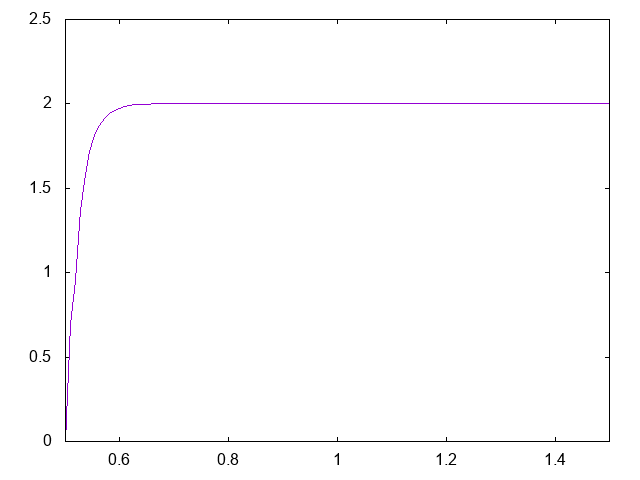

In [5]:
{
    std::stringstream ss("set xrange [0.5:1.5]\n");
    figure = G.plotData(X,pt,&ss);
}
figure

Plotting out the value of the expected utility $J$, or the certainty equivalent $U^{-1}(J)$ is not very informative. Instead we choose to plot the *investment yield* which we define as
$$
Y(T) = \frac{1}{T} \bigg( \ln( U^{-1}\{J(X,0)\} ) - \ln(X) \bigg)
$$
Note that this tends to the expected investment yield as given by Merton which is
$$
Y = (r+p_\infty(\mu-r)) - \frac12 p_\infty^2\sigma^2(1-\gamma) 
$$
where
$$
p_\infty = \frac{\mu - r}{\sigma^2(1-\gamma)}.
$$

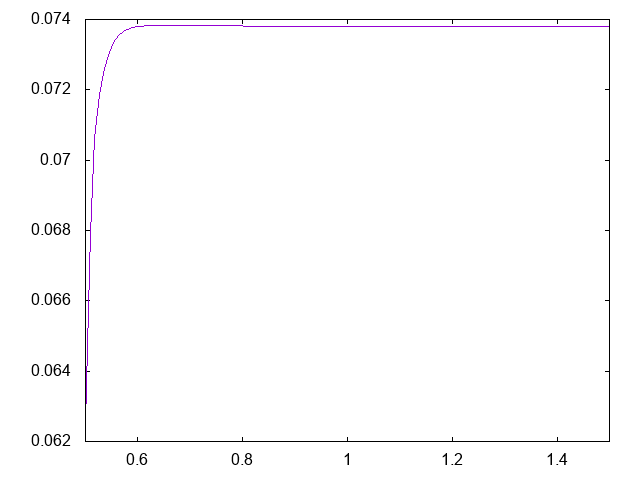

In [6]:

  investmentYield.resize(Jt.size());
  for(int i=0;i<Jt.size();i++)
  {
      // investment yield = 1/T * log(certainty equivalent / initial investment)
      investmentYield[i] = 1./T * log(pow( Gamma * Jt[i] , 1./Gamma ) / X[i]);
  }
  {
    std::stringstream ss("set xrange [0.5:1.5]\n");
    figure = G.plotData(X,investmentYield,&ss);
}
figure

See the full code solution on github [click here](https://github.com/pjohno/MSc-Math-Finance-2018/blob/master/main/project-5-hedge-funds.cpp).